# Import necessary libraries

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.utils import shuffle
from skimage.transform import resize

# Read all the file names in all  3folders (biriyani,dosa, puttu)

In [37]:
biriyani = glob.glob('biriyani/*.jpg')
dosa = glob.glob('dosa/*.jpg')
puttu =  glob.glob('puttu/*.jpg')

# Read image data from all files and store it in a variable, Store the label as well

In [38]:
len(biriyani)

75

In [39]:
len(puttu)

79

In [40]:
len(dosa)

78

In [41]:
image = []
label = []

for i in biriyani:
    img = plt.imread(i)
    image.append(img)
    label.append(1)
    
for i in dosa:
    img = plt.imread(i)
    image.append(img)
    label.append(2)
    
for i in puttu:
    img = plt.imread(i)
    image.append(img)
    label.append(3)

# Shuffle images and labels

In [42]:
label_name ={1:'biriyani',2:'dosa',3:'puttu'}

In [43]:
image,label= shuffle(image,label)

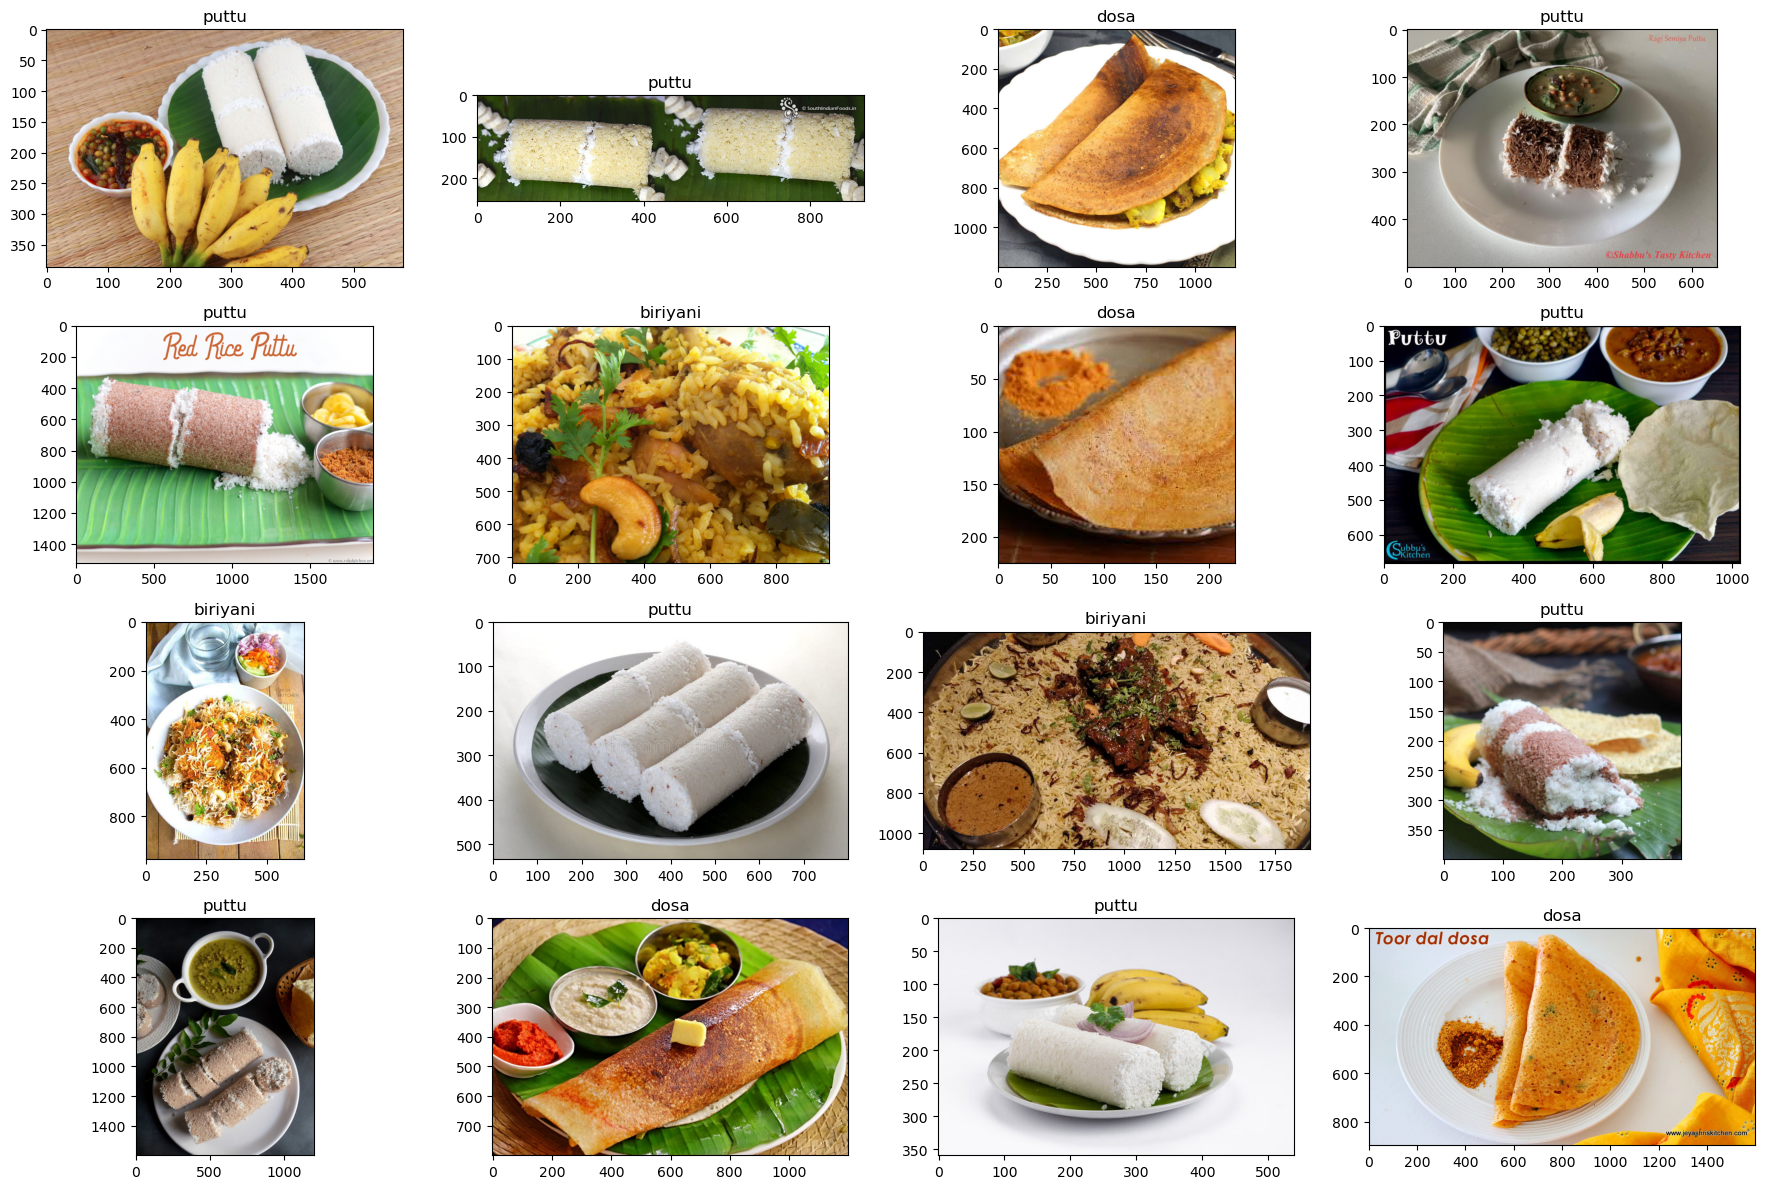

In [44]:
plt.figure(figsize = (18,12))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(image[i])
    plt.title(label_name[label[i]])
plt.tight_layout()

 # Check the shape of some of the images

In [45]:
for i in range(10):
    print(image[i].shape)

(386, 580, 3)
(255, 930, 3)
(1200, 1200, 3)
(500, 654, 3)
(1520, 1900, 3)
(717, 960, 3)
(225, 225, 3)
(681, 1024, 3)
(977, 651, 3)
(534, 800, 3)


# Resize all the images to a same height and width

In [46]:
X = []

for i in image:
    X.append(resize(i, (500,500,3)))

# Convert images and labels to numpy array and store them as X and y variables


In [47]:
X = np.array(X)

In [48]:
y = np.array(label)

# Reshape the images to 1 dimension

In [49]:
d1, d2, d3, d4 = X.shape

In [50]:
X = X.reshape((d1, d2*d3*d4))

# Train test Split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# Create Random forest  Model and train it

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
model = RandomForestClassifier()

In [55]:
model

RandomForestClassifier()

In [56]:
%time model.fit(X_train, y_train)

CPU times: total: 11.5 s
Wall time: 13.3 s


RandomForestClassifier()

# Make predictions with X_test

In [57]:
%time y_pred = model.predict(X_test)

CPU times: total: 31.2 ms
Wall time: 102 ms


In [58]:
y_pred=model.predict(X_test)

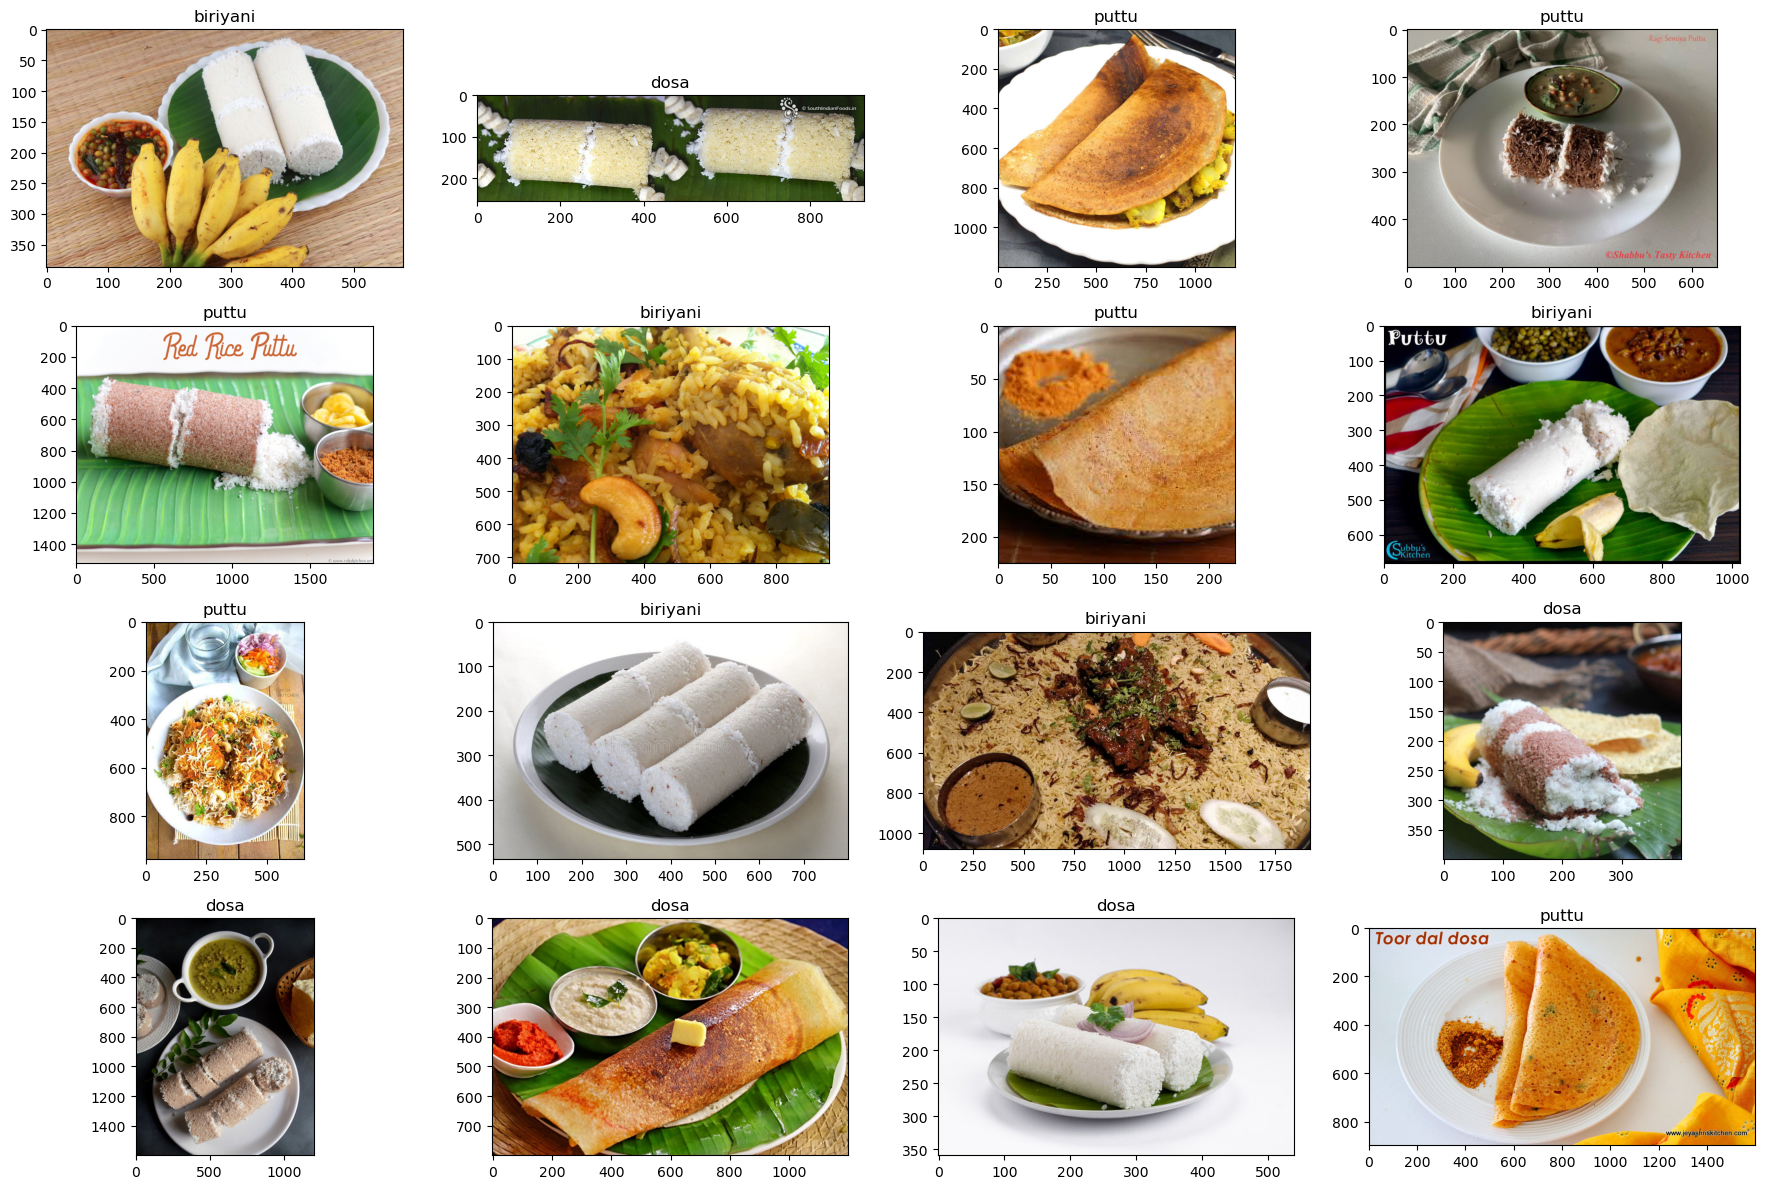

In [59]:
plt.figure(figsize = (18,12))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(image[i])
    plt.title(label_name[y_pred[i]])
plt.tight_layout()

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [61]:
accuracy_score(y_test,y_pred)

0.5957446808510638

<Axes: >

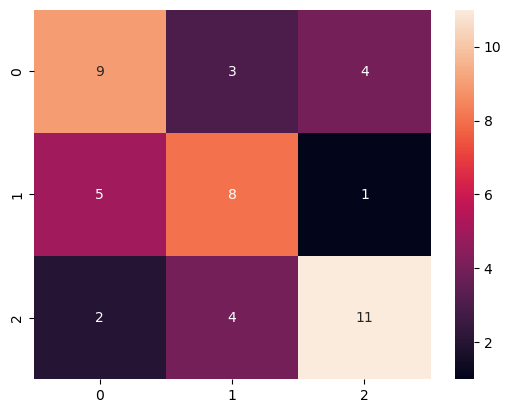

In [62]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.56      0.56      0.56        16
           2       0.53      0.57      0.55        14
           3       0.69      0.65      0.67        17

    accuracy                           0.60        47
   macro avg       0.59      0.59      0.59        47
weighted avg       0.60      0.60      0.60        47

